# Topics Covered in CMSE 2O2 

## Github

### Basic review on how to upload to github 

STEP 1:


CREATE REPOSITORY 


CREATE FILE ON YOUR LAPTOP 


On git 'cd' your way to the file name. ex cd OneDrive/desktop/cmse_202/test_file


GET THE URL FROM GITHUB 
'git clone https://github.com/YOUR-USERNAME/YOUR-REPOSITORY'

STEP 2. BRANCHES 



'git branch' WHAT BRANCH AM I ON



'git checkout -b lucas-branch' CREATES A NEW BRANCH AND PUTS YOU IN IT 



'git checkout branch-name' SWITCH BRANCHES 

STEP 3: MERGING



'git add file.txt'



git commit -m 'you have to make a message'



git checkout main


git merge lucas-branch



git push 


## Mathematical Ploting and using unfamiliar packages

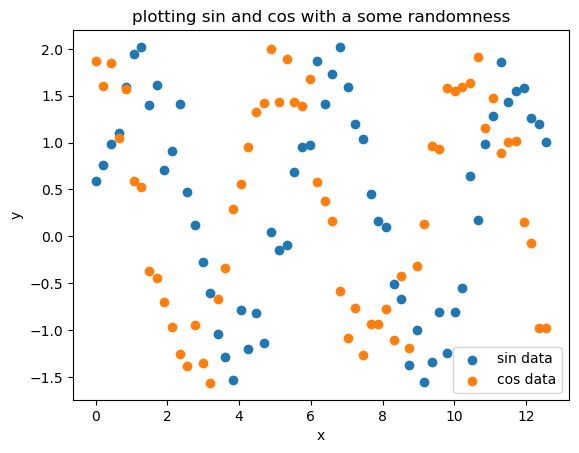

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# generate some x data: sixty data points from 0 to 4π
x_sin = np.linspace(0,4*np.pi,60)

# generate some y data: 1.5 * sin(1.2x + 0.5)
# we add the np.random.normal(0.25,.25,60) at the end to add some randomness to the data
y_sin = 1.5 * np.sin(1.2 * x_sin) + np.random.normal(.25,.25,60)

y_cos = 1.5 * np.cos(1.2 * x_sin) + np.random.normal(.25,.25,60)
# plot our data
plt.scatter(x_sin, y_sin, label = "sin data")
plt.xlabel('x')
plt.ylabel('y')

#plt.show() I removed this line so the two plots would combine into one plot

plt.scatter(x_sin, y_cos, label = "cos data")
plt.title('plotting sin and cos with a some randomness')
plt.legend()


In [2]:
import plotly 
import matplotlib.pyplot as plt

<Figure size 10000x10000 with 0 Axes>

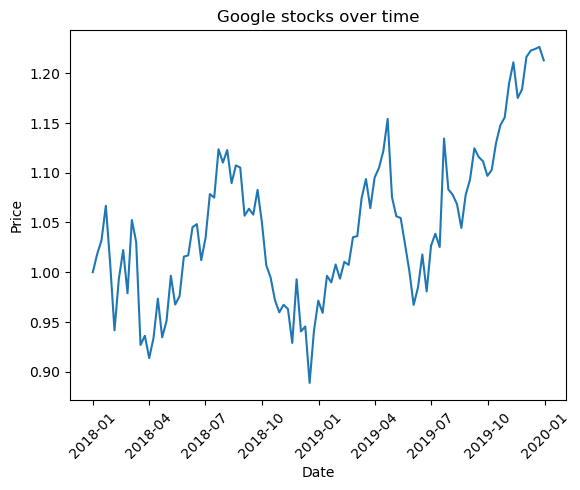

<Figure size 10000x10000 with 0 Axes>

In [3]:
df = plotly.data.stocks()
time = df['date']
google_stock = df['GOOG']
plt.plot(np.asarray(time,dtype='datetime64[s]'), google_stock)
plt.title("Google stocks over time")
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.figure(figsize =(100,100))

## Working with pandas to examine data (gross examples from homework assignments)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
zoo_df = pd.read_csv('zoo.csv')
class_df = pd.read_csv('class.csv')

In [6]:
class_df.groupby

<bound method DataFrame.groupby of    Class_Number  Number_Of_Animal_Species_In_Class    Class_Type  \
0             1                                 41        Mammal   
1             2                                 20          Bird   
2             3                                  5       Reptile   
3             4                                 13          Fish   
4             5                                  4     Amphibian   
5             6                                  8           Bug   
6             7                                 10  Invertebrate   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  
5  flea, gnat, honeybee, housefly, ladybird, moth...  
6  clam, crab, crayfish, lobster, o

Text(0, 0.5, 'Does it have hair')

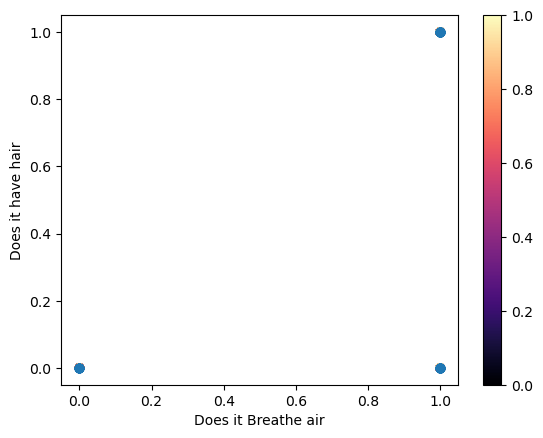

In [7]:
x = zoo_df.breathes
y = zoo_df.hair

colors = np.linspace(min(y),max(y),len(y))
plt.scatter(x, y, c=colors, cmap='magma')
plt.colorbar()
plt.scatter(x,y)



plt.xlabel('Does it Breathe air')
plt.ylabel('Does it have hair')

Text(0, 0.5, 'Does the animal produce Milk')

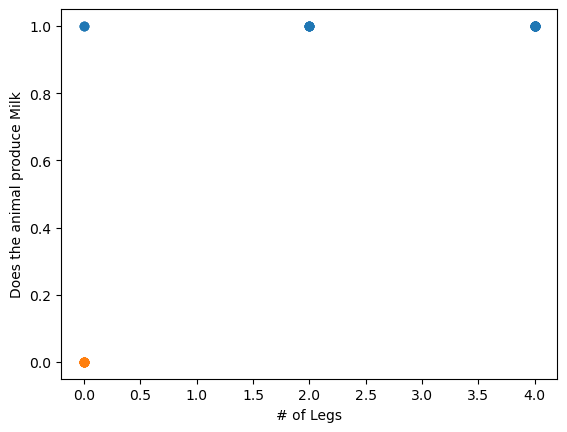

In [8]:
mmask = zoo_df.mask(zoo_df["class_type"]>1)
mammals = mmask.dropna(subset=["class_type"])
mammals

fmask = zoo_df.mask(zoo_df["class_type"]!=4)
fish = fmask.dropna(subset=["class_type"])
fish

legm =mammals.legs
milkm = mammals.milk
plt.scatter(legm, milkm)


legf =fish.legs
milkf = fish.milk
plt.scatter(legf, milkf)

plt.xlabel('# of Legs')
plt.ylabel('Does the animal produce Milk')

## Classes assingment from HW 2

In [10]:
#Example class to build off of

class Animal(object):

    """
    This is an Animal class, used to store information about animals in the Zoo.
    """

    def __init__(self, kind,habitat ,required_area=0):
        """ Initialize the Animal object.
        Inputs are
        kind: the type of animal (string)
        required_area: square meters (int)
        """
        self.kind = kind
        self.habitat = habitat
        
        habs = ['aquatic','aviary','grassland']
        areas = [10,20,30]
        if self.habitat in habs:
            index = habs.index(self.habitat) #took this line of code from https://www.programiz.com/python-programming/methods/list/index
            self.required_area = areas[index]
        else: 
            self.required_area = required_area
        


    def set_required_area(self, area):
        """ Set area required for a single animal. """
        self.required_area = area

    def set_kind(self, kind):
        """ Set the kind of the animal """
        self.kind = kind

    def set_habitat(self, habitat): #I added it here -------------------------
        self.habitat = habitat

    def get_habitat(self):
        return self.habitat
    
    def get_kind(self):
        """ Return animal's kind. """
        return self.kind

    def get_required_area(self):
        """ Return area required for a single animal. """
        return self.required_area
    
#Example class to build off of
class Zoo:
    """
        Class for Zoo object.
    """
    def __init__(self, name):
        """ Initialize the Animal object.
        Inputs are
        name: name of the zoo (string)
        animals: collection (dictionary) of animal objects
        """
        self.name = name
        self.animals = {}



    def add_animal(self, animal):
        """ Adds an animal to the zoo. """
        # we use animal's name as a key in the dictionary
        kind = animal.get_kind()
        self.animals[kind] = animal

    def add(self, animal):
        """ Shorter name of function to add animals to the Zoo. """
        self.add_animal(animal)

    def get_animals(self):
        """ Return all animals in the zoo."""
        return self.animals

    def remove(self, name):
        """ Remove animal from the Zoo for given name. If the name does not exist, error is printed. """
        if name in self.animals:
            # yes, animal with given name is in the Zoo
            del self.animals[name]
        else:
            print("Animal with given name is not in", self.name, "Zoo.")

    def get_animal_kinds(self, sort=False):
        """ Return animal kinds in the Zoo. Return sorted kinds if parameters sorted==True"""
        kinds = []
        
        for key in self.animals.keys():
            # get animal kinds and store them into list
            kinds.append(self.animals[key].get_kind())

        if sort == True:
            # we have to return sorted kinds; so sort the kinds
            kinds = sorted(kinds)

        return kinds

    def number_animals(self):
        """ Return number of animals in the Zoo."""
        return len(self.animals)

    def total_area(self):
        """ Return the total Zoo area to host all animals defined in the object. """
        area = 0

        for key in self.animals:
            # get area for all animals in the zoo
            area += self.animals[key].get_required_area()

        return area
    def get_animal_object(self):
        return 
    def habitat_areas(self): #added everything here  ----------------------------------------------------------
        AQarea = 0
        AVarea =0
        GLarea = 0
        for i in self.animals.values():

            if i.get_habitat() == 'aquatic':
                AQarea += 10
            if i.get_habitat() == 'aviary':
                AVarea += 20
            if i.get_habitat() == 'grassland':
                GLarea += 30   
        return 'the total amount of aquatic area you need is', AQarea,'the total amount of aviary area you need is', AVarea, 'the total amount of grassland area you need is', GLarea


In [12]:
larry = Animal('larry',habitat='aquatic')
larry.set_kind('lobster')
larry.set_required_area('5')

patrick = Animal('patrick', habitat='aquatic')
patrick.set_kind('starfish')
patrick.set_required_area('2')


In [13]:
potter = Zoo('Potter Park Zoo')
potter.add_animal(larry)
potter.add_animal(patrick)

In [14]:
#Example class to build off of
class Zoo:
    """
        Class for Zoo object.
    """
    def __init__(self, name):
        """ Initialize the Animal object.
        Inputs are
        name: name of the zoo (string)
        animals: collection (dictionary) of animal objects
        """
        self.name = name
        self.animals = {}

    def add_animal(self, animal):
        """ Adds an animal to the zoo. """
        # we use animal's name as a key in the dictionary
        kind = animal.get_kind()
        self.animals[kind] = animal

    def add(self, animal):
        """ Shorter name of function to add animals to the Zoo. """
        self.add_animal(animal)

    def get_animals(self):
        """ Return all animals in the zoo."""
        return self.animals

    def remove(self, name):
        """ Remove animal from the Zoo for given name. If the name does not exist, error is printed. """
        if name in self.animals:
            # yes, animal with given name is in the Zoo
            del self.animals[name]
        else:
            print("Animal with given name is not in", self.name, "Zoo.")

    def get_animal_kinds(self, sort=False):
        """ Return animal kinds in the Zoo. Return sorted kinds if parameters sorted==True"""
        kinds = []
        
        for key in self.animals.keys():
            # get animal kinds and store them into list
            kinds.append(self.animals[key].get_kind())

        if sort == True:
            # we have to return sorted kinds; so sort the kinds
            kinds = sorted(kinds)

        return kinds

    def number_animals(self):
        """ Return number of animals in the Zoo."""
        return len(self.animals)

    def total_area(self):
        """ Return the total Zoo area to host all animals defined in the object. """
        area = 0

        for key in self.animals:
            # get area for all animals in the zoo
            area += self.animals[key].get_required_area()

        return area
    
    def habitat_areas(self): #added everything here  ----------------------------------------------------------
        AQarea = 0
        AVarea =0
        GLarea = 0
        """for key in self.animals.keys():
            # get animal kinds and store them into list
            kinds.append(self.animals[key].get_kind())"""
        for i in self.animals.values():
            if i.get_habitat() == 'aquatic':
                AQarea += 10
            if i.get_habitat() == 'aviary':
                AVarea += 20
            if i.get_habitat() == 'grassland':
                GLarea += 30   
        return 'the total amount of aquatic area you need is', AQarea,'the total amount of aviary area you need is', AVarea, 'the total amount of grassland area you need is', GLarea




In [15]:
nevermore = Animal('nevermore',habitat='aviary')
nevermore.set_kind('crow')
nevermore.set_habitat('aviary')

moonmoon = Animal('moonmoon', habitat='grassland')
moonmoon.set_kind('wolf')
moonmoon.set_habitat('grassland')

mrkrabs = Animal('mrkrabs',habitat='aquatic')
mrkrabs.set_kind('crab')
mrkrabs.set_habitat('aquatic')

potter.add_animal(nevermore)
potter.add_animal(moonmoon)
potter.add_animal(mrkrabs)

potter.habitat_areas()

('the total amount of aquatic area you need is',
 30,
 'the total amount of aviary area you need is',
 20,
 'the total amount of grassland area you need is',
 30)

In [16]:
#Extend the following code for all habitat types

# to limit the output you can write zoo_df.sample(20).iterrows() to give you a sample of 20 animals
for i, animal_row in zoo_df.iterrows():
    if (animal_row.legs > 0) and (animal_row.airborne == 0) and (animal_row.aquatic == 0):
        print("{0} needs to go to the grassland habitat ".format(animal_row['animal_name']))

    if (animal_row.aquatic == 1) and (animal_row.legs == 0):
        print("{0} needs to go to the aquatic habitat ".format(animal_row['animal_name']))

    if (animal_row.airborne == 1) and (animal_row.milk == 0):
        print("{0} needs to go to the aviary habitat ".format(animal_row['animal_name']))

aardvark needs to go to the grassland habitat 
antelope needs to go to the grassland habitat 
bass needs to go to the aquatic habitat 
bear needs to go to the grassland habitat 
boar needs to go to the grassland habitat 
buffalo needs to go to the grassland habitat 
calf needs to go to the grassland habitat 
carp needs to go to the aquatic habitat 
catfish needs to go to the aquatic habitat 
cavy needs to go to the grassland habitat 
cheetah needs to go to the grassland habitat 
chicken needs to go to the aviary habitat 
chub needs to go to the aquatic habitat 
crow needs to go to the aviary habitat 
deer needs to go to the grassland habitat 
dogfish needs to go to the aquatic habitat 
dolphin needs to go to the aquatic habitat 
dove needs to go to the aviary habitat 
duck needs to go to the aviary habitat 
elephant needs to go to the grassland habitat 
flamingo needs to go to the aviary habitat 
flea needs to go to the grassland habitat 
giraffe needs to go to the grassland habitat 
g

## Simulating animal populations using ABM + OOP

In [17]:
from Environment import Environment
from Animal_Agent_Class import Animal_Agent, Mouse, Hawk
import random

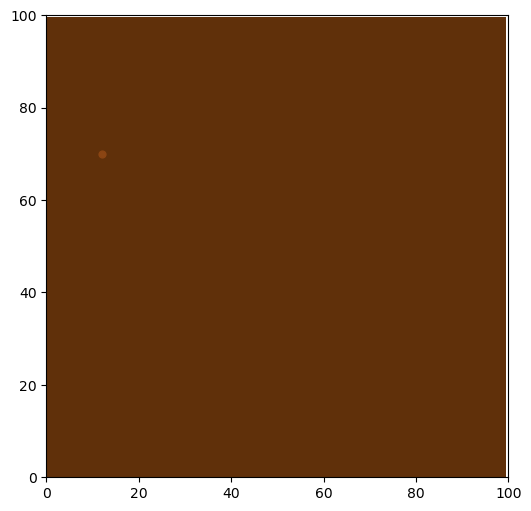

In [18]:
EnvObj = Environment()
AniObj = Animal_Agent(sex ='F')
EnvObj.add_agent(AniObj)
EnvObj.simulate(tot_time=25)


In [19]:
    def simulate(self,tot_time):
        for dt in range(tot_time):
            clear_output(wait=True)
            plt.figure(figsize=(6, 6))    
            plt.imshow(self.environ) 
            ax = plt.gca()   
            
            # loop over each animal
            temp_agents = []
            temp_hunted_agents = []
            for agent in self.animal_agents:
                agent.roaming()
                agent.draw(ax)
                
                if agent.ptype == "Prey":
                    agent.aging()
                    
                    if agent.check_if_dead():
                        del agent
                    else:
                        temp_agents.append(agent)
                        temp_new_agents = agent.procreate(self.animal_agents,dt) #THIS IS THE LINE I FIXED -----------------------------------
                        if len(temp_new_agents) > 0:
                            temp_agents.extend(temp_new_agents)
                elif agent.ptype == "Predator":
                    caught_prey = agent.hunt(self.animal_agents)
                    if caught_prey:
                        temp_hunted_agents.append(caught_prey)
                    temp_agents.append(agent)
            
            for agent in temp_hunted_agents:
                temp_agents.remove(agent)        
            self.animal_agents.clear
            self.animal_agents = temp_agents
            plt.xlim(0,self.xsize)
            plt.ylim(0,self.ysize)
            plt.show()   
            time.sleep(0.001)     

In [20]:
alle_d = random.randint(0,1)
alle_m = random.randint(0,1)
AniObj.set_allele(alle_d,alle_m)

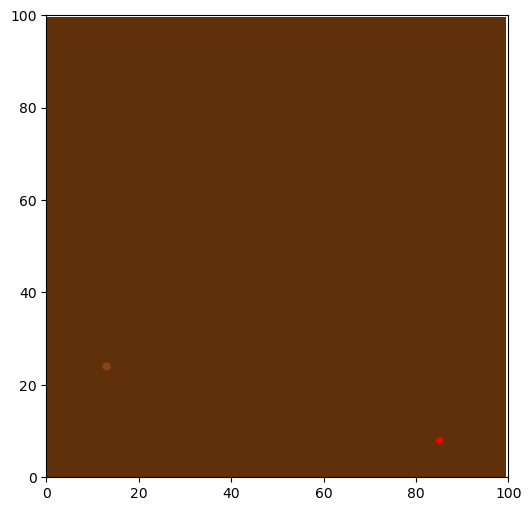

In [21]:
PredObj = Animal_Agent(ptype='Predator', shape='P', color='red')
EnvObj.add_agent(PredObj)

EnvObj.simulate(tot_time=25)

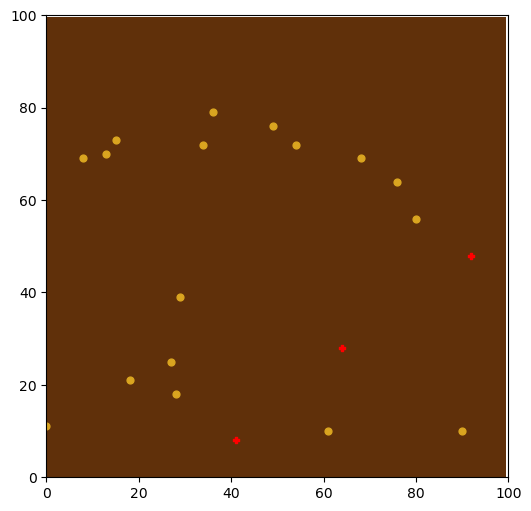

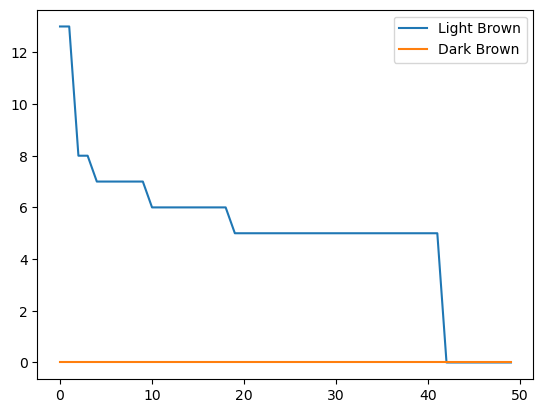

In [22]:
EnvObj = Environment()

PredObj2 = Animal_Agent(ptype='Predator', shape='P',sex ='M',color='red')
EnvObj.add_agent(PredObj2)
PredObj3 = Animal_Agent(ptype='Predator', shape='P',sex = 'F',color='red')
EnvObj.add_agent(PredObj3)

PredObj3 = Animal_Agent(ptype='Predator', shape='P',sex ='M',color='red')
EnvObj.add_agent(PredObj3)




AniObj2 = Animal_Agent(sex ='F',ptype='Prey')
AniObj2.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj2)

AniObj2 = Animal_Agent(sex ='M',ptype='Prey')
AniObj2.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj2)

AniObj3 = Animal_Agent(sex ='F',ptype='Prey')
AniObj3.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj3)

AniObj4 = Animal_Agent(sex ='M',ptype='Prey')
AniObj4.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj4)

AniObj5 = Animal_Agent(sex ='F',ptype='Prey')
AniObj5.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj5)

AniObj6 = Animal_Agent(sex ='M',ptype='Prey')
AniObj6.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj6)

AniObj7 = Animal_Agent(sex ='F',ptype='Prey')
AniObj7.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj7)

AniObj8 = Animal_Agent(sex ='M',ptype='Prey')
AniObj8.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj8)


AniObj9 = Animal_Agent(sex ='M',ptype='Prey')
AniObj9.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj9)


AniObj10 = Animal_Agent(sex ='M',ptype='Prey')
AniObj10.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj10)

AniObj20 = Animal_Agent(sex ='M',ptype='Prey')
AniObj20.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj20)

AniObj30 = Animal_Agent(sex ='F',ptype='Prey')
AniObj30.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj30)

AniObj40 = Animal_Agent(sex ='M',ptype='Prey')
AniObj40.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj40)

AniObj50 = Animal_Agent(sex ='F',ptype='Prey')
AniObj50.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj50)

AniObj60 = Animal_Agent(sex ='M',ptype='Prey')
AniObj60.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj60)

AniObj70= Animal_Agent(sex ='F',ptype='Prey')
AniObj70.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj70)

AniObj80 = Animal_Agent(sex ='M',ptype='Prey')
AniObj80.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
EnvObj.add_agent(AniObj80)


AniObj90 = Animal_Agent(sex ='M',ptype='Prey')
AniObj90.set_allele(alle_d = random.randint(0,0),alle_m = random.randint(0,0))
EnvObj.add_agent(AniObj90)


AniObj100 = Animal_Agent(sex ='M',ptype='Prey')
AniObj100.set_allele(alle_d = random.randint(0,0),alle_m = random.randint(0,0))
EnvObj.add_agent(AniObj100)

EnvObj.simulate(tot_time=50)
EnvObj.simulate_plot_populations(tot_time=50)

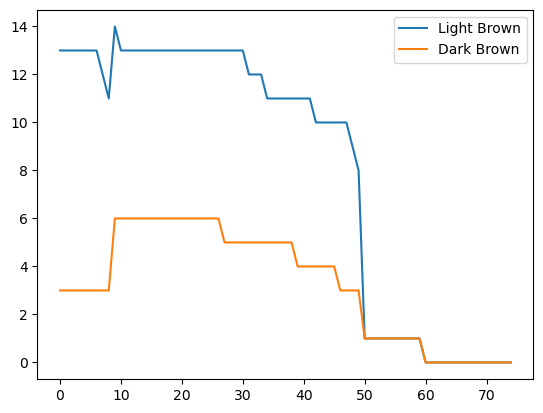

In [23]:
NewEnv = Environment()

Hawk1 = Hawk(ptype='Predator',sex ='F',color='red')
NewEnv.add_agent(Hawk1)

Hawk2 = Hawk(ptype='Predator',sex ='M',color ='red')
NewEnv.add_agent(Hawk2)


Hawk3 = Hawk(ptype='Predator',sex ='F',color='red')
NewEnv.add_agent(Hawk3)


Mouse1 = Mouse(ptype='Prey',sex='F')
Mouse1.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse1)
Mouse2 = Mouse(ptype='Prey',sex='F')
Mouse2.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse2)
Mouse3 = Mouse(ptype='Prey',sex='F')
Mouse3.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse3)
Mouse4 = Mouse(ptype='Prey',sex='M')
Mouse4.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse4)
Mouse5 = Mouse(ptype='Prey',sex='F')
Mouse5.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse5)
Mouse6 = Mouse(ptype='Prey',sex='F')
Mouse6.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse6)
Mouse7 = Mouse(ptype='Prey',sex='F')
Mouse7.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse7)
Mouse8 = Mouse(ptype='Prey',sex='M')
Mouse8.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse8)
Mouse10 = Mouse(ptype='Prey',sex='F')
Mouse10.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse10)
Mouse20 = Mouse(ptype='Prey',sex='F')
Mouse20.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse20)
Mouse30 = Mouse(ptype='Prey',sex='F')
Mouse30.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse30)
Mouse40 = Mouse(ptype='Prey',sex='M')
Mouse40.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse40)
Mouse50 = Mouse(ptype='Prey',sex='F')
Mouse50.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse50)
Mouse60 = Mouse(ptype='Prey',sex='F')
Mouse60.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse60)
Mouse70 = Mouse(ptype='Prey',sex='F')
Mouse70.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse70)
Mouse80 = Mouse(ptype='Prey',sex='M')
Mouse80.set_allele(alle_d = random.randint(0,1),alle_m = random.randint(0,1))
NewEnv.add_agent(Mouse80)

#NewEnv.simulate(tot_time=75)
NewEnv.simulate_plot_populations(tot_time=75)



## Prediction modeling and SVM

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
import seaborn as sns
from sklearn import svm

In [25]:
df = pd.read_csv('aussie_weather_data.csv')
df

,Year,Month,DayOfMonth,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009,1,1,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,112.5,...,84.0,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,0,0
1,2009,1,2,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,90.0,...,79.0,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,0,0
2,2009,1,3,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,0.0,...,87.0,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,0,1
3,2009,1,4,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,337.5,...,92.0,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,1,1
4,2009,1,5,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,337.5,...,86.0,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39510,2017,6,20,Darwin,19.3,33.4,0.0,6.0,11.0,22.5,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
39511,2017,6,21,Darwin,21.2,32.6,0.0,7.6,8.6,0.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
39512,2017,6,22,Darwin,20.7,32.8,0.0,5.6,11.0,0.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
39513,2017,6,23,Darwin,19.5,31.8,0.0,6.2,10.6,337.5,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [26]:
Brisbane = df.loc[df['Location']=='Brisbane']
Brisbane

,Year,Month,DayOfMonth,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
16003,2008,7,1,Brisbane,10.3,25.2,0.0,1.4,9.5,157.5,...,81.0,37.0,1019.6,1014.8,0.0,1.0,14.9,24.6,0,0
16004,2008,7,2,Brisbane,8.1,22.9,0.0,2.0,9.8,180.0,...,41.0,30.0,1018.8,1015.0,0.0,0.0,16.2,22.4,0,0
16005,2008,7,3,Brisbane,9.7,22.4,0.0,5.8,9.4,0.0,...,55.0,52.0,1021.4,1019.1,1.0,4.0,15.4,21.3,0,0
16006,2008,7,4,Brisbane,11.8,20.0,0.8,1.8,1.1,225.0,...,76.0,53.0,1023.5,1021.7,7.0,7.0,14.1,19.6,0,0
16007,2008,7,5,Brisbane,12.3,16.7,0.0,2.0,0.3,270.0,...,81.0,89.0,1027.3,1026.2,7.0,8.0,16.1,15.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18951,2017,6,21,Brisbane,12.2,23.4,0.0,4.0,9.2,202.5,...,61.0,44.0,1023.4,1021.3,1.0,4.0,17.2,23.3,0,0
18952,2017,6,22,Brisbane,13.7,22.7,0.0,3.4,7.2,315.0,...,62.0,55.0,1026.0,1022.4,2.0,3.0,17.8,20.5,0,0
18953,2017,6,23,Brisbane,10.3,23.7,0.0,3.2,9.4,180.0,...,71.0,37.0,1023.3,1018.4,1.0,3.0,15.2,23.1,0,0
18954,2017,6,24,Brisbane,10.4,24.5,0.0,3.4,8.9,270.0,...,75.0,33.0,1018.6,1015.4,7.0,5.0,14.3,24.0,0,0


In [27]:
X = Brisbane.drop('RainToday', axis=1)
Y = Brisbane['RainToday']
X = X.drop('Location',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=333)
train,test = train_test_split(Brisbane,test_size=0.25,random_state=123)

In [28]:
model =LogisticRegression()
model.fit(X,Y)
results = model.predict(X)
x_const = sm.add_constant(X)
actualmodel = sm.OLS(Y,x_const)
results = actualmodel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              RainToday   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     79.83
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.02e-288
Time:                        09:55:46   Log-Likelihood:                -856.49
No. Observations:                2953   AIC:                             1761.
Df Residuals:                    2929   BIC:                             1905.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.3732      5.015     -1.271

C:\Users\Lucas\anacond_fresh\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


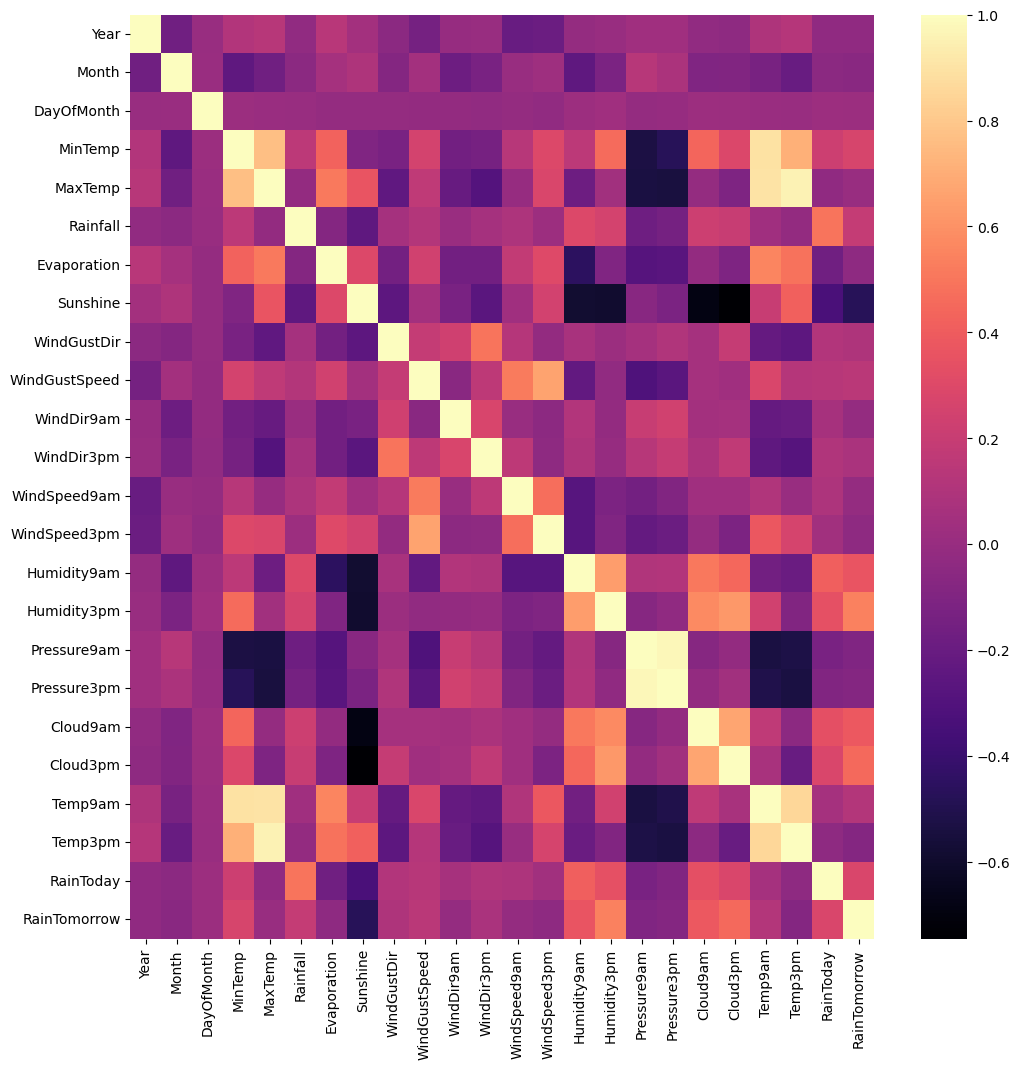

In [29]:
fig, ax = plt.subplots(1,1, figsize = (12,12) )

corrm = Brisbane.corr()
heatmap = sns.heatmap(corrm, annot= False, cmap='magma')

In [30]:
Freq = Brisbane.loc[Brisbane['RainToday']==1]
print(len(Brisbane),len(Freq))
print(len(Freq)/len(Brisbane))

2953 642
0.21740602776837115


### SVM model

In [31]:
param = [{'kernel' :['linear'],'C':[0.01,0.1,1.0,10.0], 'gamma':[0.01,0.1,1.0,10.0]},
         {'kernel' :['rbf'], 'C':[0.01,0.1,1.0,10.0], 'gamma':[0.01,0.1,1.0,10.0]}]
svc = svm.SVC()
clf = GridSearchCV(svc, param, n_jobs = -1)
clf.fit(X,Y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0],
                          'gamma': [0.01, 0.1, 1.0, 10.0],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1.0, 10.0],
                          'gamma': [0.01, 0.1, 1.0, 10.0], 'kernel': ['rbf']}])

In [32]:
clf.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [33]:
svcBEST = svm.SVC(kernel='linear',C=0.1,gamma=0.01)
svcBEST.fit(X_train,Y_train)
results = svcBEST.predict(X_test)
conm = confusion_matrix(Y_test,results)

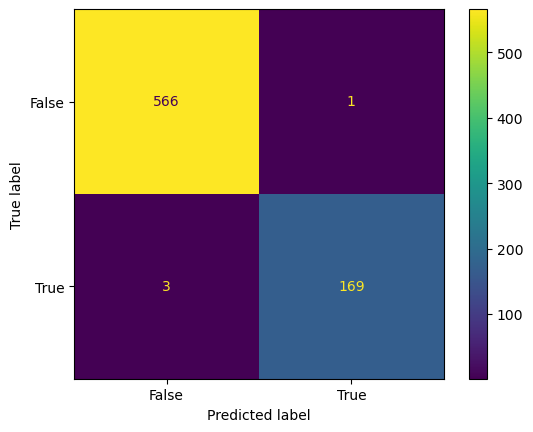

In [34]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conm, display_labels = [False, True])
cm_display.plot()
#Accuracy is 99% accurate